In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import random

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['xtick.direction'] = 'in'  # 将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'  # 将y轴的刻度方向设置向内
%matplotlib inline
%config InlineBackend.figure_format='retina'
%matplotlib inline
matplotlib.rcParams['font.family'] = 'Times New Roman'

In [3]:
data = pd.read_excel(r"F:\开始熔化温度，数据集\半球法\数据预处理\开始熔化温度 (半球法) 第一版.xlsx",index_col = 0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 1 to 503
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Heating rate  503 non-null    float64
 1   CaO           503 non-null    float64
 2   SiO2          503 non-null    float64
 3   Al2O3         503 non-null    float64
 4   MgO           503 non-null    float64
 5   Na2O          503 non-null    float64
 6   F             503 non-null    float64
 7   Li2O          503 non-null    float64
 8   B2O3          503 non-null    float64
 9   Fe2O3         503 non-null    float64
 10  MnO           503 non-null    float64
 11  Cr2O3         503 non-null    float64
 12  TiO2          503 non-null    float64
 13  BaO           503 non-null    float64
 14  K2O           503 non-null    float64
 15  V2O5          503 non-null    int64  
 16  FeO           503 non-null    float64
 17  P2O5          503 non-null    int64  
 18  S             503 non-null    int64

In [5]:
X = data.iloc[:,data.columns!= "T (℃)"]
y = data.iloc[:,data.columns == "T (℃)"]

In [6]:
X

,Heating rate,CaO,SiO2,Al2O3,MgO,Na2O,F,Li2O,B2O3,Fe2O3,...,BaO,K2O,V2O5,FeO,P2O5,S,Ce2O3,La2O3,R,CaO/AL2O3
Number,,,,,,,,,,,,,,,,,,,,,
1,25.0,45.81,36.64,3.90,0.00,7.80,5.85,0.00,0.0,0.0,...,0.00,0.0,0,0.0,0,0,0.0,0,1.25,11.75
2,25.0,45.53,36.42,3.90,0.00,7.80,5.85,0.49,0.0,0.0,...,0.00,0.0,0,0.0,0,0,0.0,0,1.25,11.67
3,25.0,45.26,36.20,3.90,0.00,7.80,5.85,0.98,0.0,0.0,...,0.00,0.0,0,0.0,0,0,0.0,0,1.25,11.61
4,25.0,45.00,35.99,3.90,0.00,7.80,5.85,1.46,0.0,0.0,...,0.00,0.0,0,0.0,0,0,0.0,0,1.25,11.54
5,25.0,44.72,35.77,3.90,0.00,7.80,5.85,1.95,0.0,0.0,...,0.00,0.0,0,0.0,0,0,0.0,0,1.25,11.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,25.0,39.00,37.61,2.94,3.92,5.88,4.77,0.00,0.0,0.0,...,5.88,0.0,0,0.0,0,0,0.0,0,1.04,13.27
500,25.0,35.40,33.37,2.94,3.92,5.88,4.77,0.00,0.0,0.0,...,5.88,0.0,0,0.0,0,0,0.0,0,1.06,12.04
501,25.0,39.90,38.67,2.94,3.92,5.88,4.77,0.00,0.0,0.0,...,0.00,0.0,0,0.0,0,0,0.0,0,1.03,13.57


In [7]:
# 3. 特征归一化
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)

# 4. 标签归一化
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

In [8]:
X_scaled

array([[ 0.75796298,  0.93419587,  0.7869355 , ...,  0.        ,
        -0.46929953,  0.33505101],
       [ 0.75796298,  0.90644201,  0.77255088, ...,  0.        ,
        -0.46929953,  0.32751491],
       [ 0.75796298,  0.87967937,  0.75816627, ...,  0.        ,
        -0.46929953,  0.32186284],
       ...,
       [ 0.75796298,  0.34839128,  0.91966623, ...,  0.        ,
        -0.54412941,  0.50649719],
       [ 0.75796298, -0.18686164,  0.50382018, ...,  0.        ,
        -0.53052398,  0.33316698],
       [ 0.75796298,  0.08076482,  0.71174321, ...,  0.        ,
        -0.5373267 ,  0.41983209]])

In [9]:
X_tr, X_temp, y_tr, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=99)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=99)

In [10]:
X_tr = torch.FloatTensor(X_tr)
X_val = torch.FloatTensor(X_val)
X_test = torch.FloatTensor(X_test)
y_tr = torch.FloatTensor(y_tr)
y_val = torch.FloatTensor(y_val)
y_test = torch.FloatTensor(y_test)

In [11]:
X_tr

tensor([[ 0.7580, -0.7370,  0.7124,  ...,  0.0000, -0.6156, -0.4233],
        [-0.8889, -0.1333, -1.2818,  ...,  0.0000,  1.4899, -0.6494],
        [ 0.7580, -0.1888,  0.8974,  ...,  0.0000, -0.5883, -0.2141],
        ...,
        [-0.8889, -0.3464,  0.1115,  ...,  0.0000, -0.4693,  0.0025],
        [-0.8889, -0.0213, -1.2818,  ...,  0.0000,  1.5647, -0.6494],
        [-0.8889,  0.1422,  0.6294,  ...,  0.0000, -0.5203,  0.1937]])

In [12]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, dropout_rate=0.3):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),  # 第一层，全连接
            nn.ReLU(),                         # 激活函数：ReLU
            nn.BatchNorm1d(hidden_dim),        # 批标准化，加快训练收敛
            nn.Dropout(dropout_rate),          # Dropout 随机丢弃节点，防止过拟合

            nn.Linear(hidden_dim, hidden_dim), # 第二层
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim),
            nn.Dropout(dropout_rate),
        
            #nn.Linear(hidden_dim, hidden_dim_1),
            #nn.ReLU(),
            #nn.BatchNorm1d(hidden_dim_1),
            #nn.Dropout(dropout_rate),
        )
        self.regressor = nn.Linear(hidden_dim, 1)  # 输出层，输出一个熔点值

    def forward(self, x):
        x = self.feature_extractor(x)
        return self.regressor(x)

In [16]:
'''for param in model.parameters():
    print(param.shape)

SyntaxError: EOF while scanning triple-quoted string literal (3302522221.py, line 2)

In [13]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

In [17]:
set_seed(188)  # 🔑 一定要放在初始化模型之前
# 8. 初始化模型
model = MLP(input_dim=X_tr.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()# 记录最优模型

patience = 50   # 容忍多少个 epoch 没有提升
best_val_loss = float("inf")
best_model_state = None
epochs_no_improve = 0

# 用于保存每轮训练指标
val_losses = []
val_r2s = []

for epoch in range(1, 1001):
    # ===== 训练 =====
    model.train()
    pred = model(X_tr)
    loss = criterion(pred, y_tr)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # ===== 验证 =====
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_pred_rescaled = y_scaler.inverse_transform(val_pred.numpy())
        y_val_rescaled = y_scaler.inverse_transform(y_val.numpy())

        val_loss = mean_squared_error(y_val_rescaled, val_pred_rescaled)
        val_r2 = r2_score(y_val_rescaled, val_pred_rescaled)

    # 保存历史数据
    val_losses.append(val_loss)
    val_r2s.append(val_r2)
        
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0  # 重置计数
    else:
        epochs_no_improve += 1

    print(f"Epoch {epoch}: MSE={val_loss:.2f}, R²={val_r2:.3f}")

    # ===== 早停 =====
    if epochs_no_improve >= patience:
        print(f"早停触发: 在 {epoch} 轮时验证集无提升，提前结束训练")
        break

# 加载最佳模型
model.load_state_dict(best_model_state)
print(f"训练完成，最佳验证集 MSE={best_val_loss:.2f}")

Epoch 1: MSE=7684.30, R²=-0.039
Epoch 2: MSE=7560.09, R²=-0.022
Epoch 3: MSE=7426.70, R²=-0.004
Epoch 4: MSE=7274.37, R²=0.016
Epoch 5: MSE=7103.58, R²=0.039
Epoch 6: MSE=6907.94, R²=0.066
Epoch 7: MSE=6693.83, R²=0.095
Epoch 8: MSE=6469.65, R²=0.125
Epoch 9: MSE=6230.77, R²=0.157
Epoch 10: MSE=5977.27, R²=0.192
Epoch 11: MSE=5716.02, R²=0.227
Epoch 12: MSE=5446.50, R²=0.263
Epoch 13: MSE=5186.31, R²=0.299
Epoch 14: MSE=4934.92, R²=0.333
Epoch 15: MSE=4674.78, R²=0.368
Epoch 16: MSE=4431.77, R²=0.401
Epoch 17: MSE=4188.81, R²=0.433
Epoch 18: MSE=3967.26, R²=0.463
Epoch 19: MSE=3761.27, R²=0.491
Epoch 20: MSE=3572.85, R²=0.517
Epoch 21: MSE=3396.02, R²=0.541
Epoch 22: MSE=3239.80, R²=0.562
Epoch 23: MSE=3107.62, R²=0.580
Epoch 24: MSE=2983.67, R²=0.596
Epoch 25: MSE=2868.26, R²=0.612
Epoch 26: MSE=2768.81, R²=0.626
Epoch 27: MSE=2672.41, R²=0.639
Epoch 28: MSE=2576.31, R²=0.652
Epoch 29: MSE=2481.43, R²=0.664
Epoch 30: MSE=2395.05, R²=0.676
Epoch 31: MSE=2315.19, R²=0.687
Epoch 32: MSE=

Epoch 259: MSE=883.66, R²=0.880
Epoch 260: MSE=885.43, R²=0.880
Epoch 261: MSE=886.41, R²=0.880
Epoch 262: MSE=888.68, R²=0.880
Epoch 263: MSE=888.73, R²=0.880
Epoch 264: MSE=884.98, R²=0.880
Epoch 265: MSE=883.61, R²=0.880
Epoch 266: MSE=884.59, R²=0.880
Epoch 267: MSE=888.20, R²=0.880
Epoch 268: MSE=886.38, R²=0.880
Epoch 269: MSE=888.09, R²=0.880
Epoch 270: MSE=889.00, R²=0.880
Epoch 271: MSE=888.60, R²=0.880
Epoch 272: MSE=884.99, R²=0.880
Epoch 273: MSE=885.57, R²=0.880
Epoch 274: MSE=883.72, R²=0.880
Epoch 275: MSE=885.11, R²=0.880
Epoch 276: MSE=882.41, R²=0.881
Epoch 277: MSE=881.90, R²=0.881
Epoch 278: MSE=875.06, R²=0.882
Epoch 279: MSE=868.33, R²=0.883
Epoch 280: MSE=862.67, R²=0.883
Epoch 281: MSE=854.35, R²=0.884
Epoch 282: MSE=853.29, R²=0.885
Epoch 283: MSE=857.34, R²=0.884
Epoch 284: MSE=860.18, R²=0.884
Epoch 285: MSE=862.05, R²=0.883
Epoch 286: MSE=864.75, R²=0.883
Epoch 287: MSE=865.33, R²=0.883
Epoch 288: MSE=863.60, R²=0.883
Epoch 289: MSE=866.55, R²=0.883
Epoch 29

In [16]:
# 构建 DataFrame
df_train_history = pd.DataFrame({
    'Epoch': list(range(1, len(val_losses)+1)),
    'MSE': val_losses,
    'R2': val_r2s
})

# 保存 Excel
save_path = r"F:\开始熔化温度，数据集\半球法\数据预处理\训练过程循环图\train_history（150停止作图用）.xlsx"
df_train_history.to_excel(save_path, index=False)

print(f"训练过程数据已保存到 {save_path}")

训练过程数据已保存到 F:\开始熔化温度，数据集\半球法\数据预处理\训练过程循环图\train_history（150停止作图用）.xlsx


In [22]:
model.eval()
with torch.no_grad():
    val_pred = model(X_val)

        # 还原
    val_pred_rescaled = y_scaler.inverse_transform(val_pred.numpy())
    y_val_rescaled = y_scaler.inverse_transform(y_val.numpy())

    val_loss = mean_squared_error(y_val_rescaled, val_pred_rescaled)
    val_r2 = r2_score(y_val_rescaled, val_pred_rescaled)
val_r2

0.8898386359214783

In [23]:
# ✅ 评估阶段：使用测试集
model.eval()  # 设置为评估模式（关闭 dropout/batchnorm 的随机行为）
with torch.no_grad():  # 不计算梯度，提高效率
    test_pred = model(X_test)  # 测试集预测结果（标准化后）

    # 还原归一化（注意用的是 y_scaler）
    test_pred_rescaled = y_scaler.inverse_transform(test_pred.numpy())
    y_test_rescaled = y_scaler.inverse_transform(y_test.numpy())

    # 评估指标
    test_mse = mean_squared_error(y_test_rescaled, test_pred_rescaled)
    test_r2 = r2_score(y_test_rescaled, test_pred_rescaled)

print(f"\n[Test Set Evaluation] MSE: {test_mse:.2f}, R²: {test_r2:.3f}")


[Test Set Evaluation] MSE: 1268.65, R²: 0.874


In [24]:
r2_score(y_test_rescaled,test_pred_rescaled)

0.8735760450363159

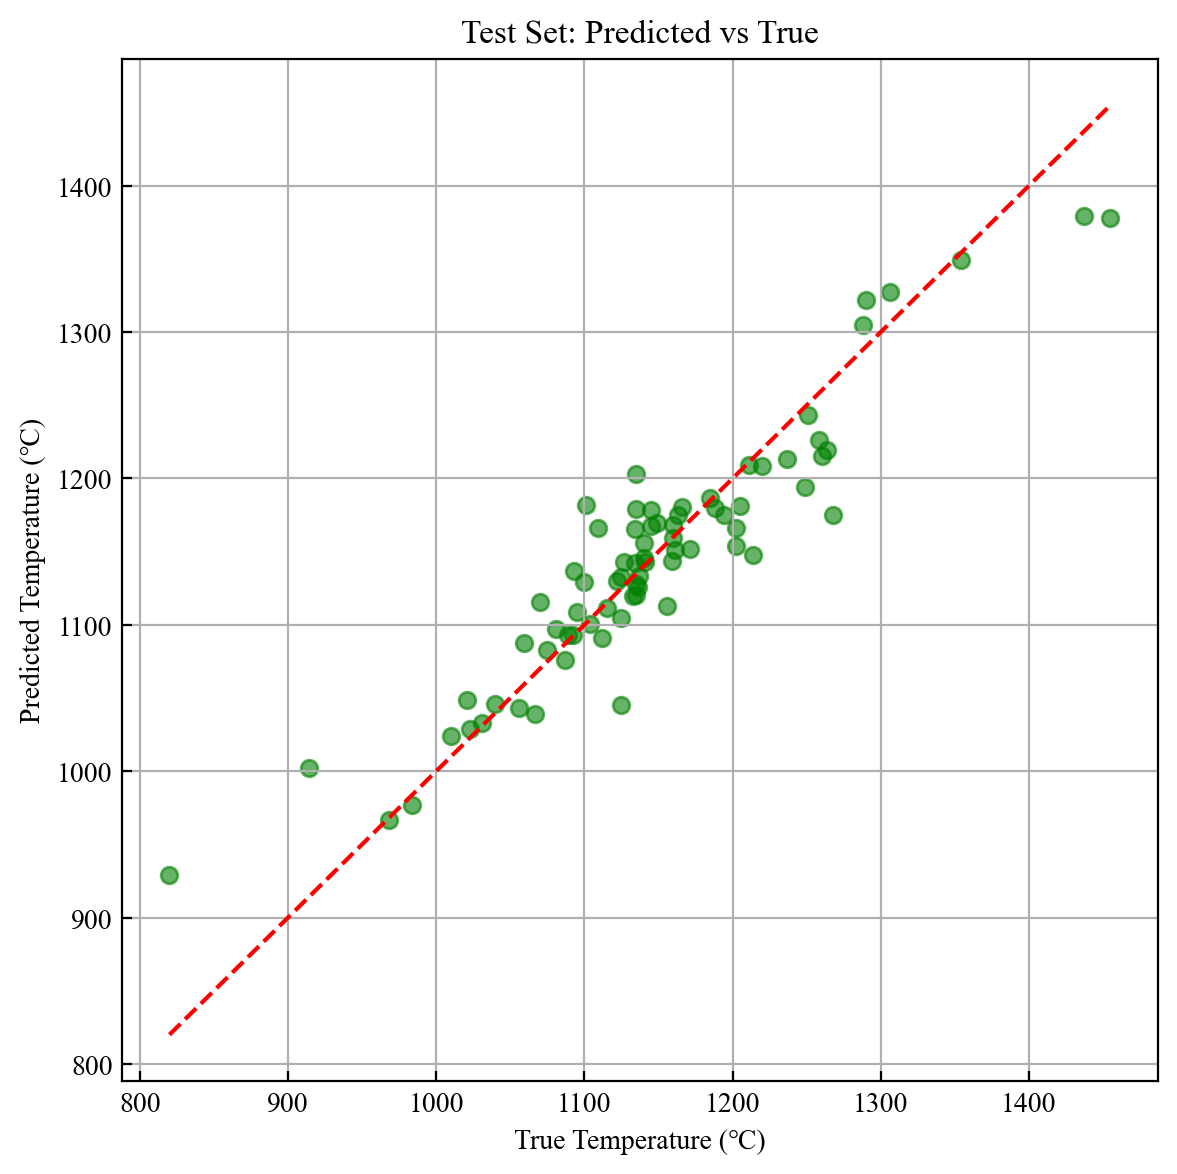

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test_rescaled, test_pred_rescaled, alpha=0.6, color='green')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()],
         [y_test_rescaled.min(), y_test_rescaled.max()], 'r--')
plt.xlabel("True Temperature (℃)")
plt.ylabel("Predicted Temperature (℃)")
plt.title("Test Set: Predicted vs True")
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
'''torch.save(model.state_dict(), "G:\开始熔化温度，数据集\半球法\数据预处理\mlp_model_hemisphere_vision_2.pth")

In [ ]:
#调用测试

In [14]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, dropout_rate=0.3):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),  # 第一层，全连接
            nn.ReLU(),                         # 激活函数：ReLU
            nn.BatchNorm1d(hidden_dim),        # 批标准化，加快训练收敛
            nn.Dropout(dropout_rate),          # Dropout 随机丢弃节点，防止过拟合

            nn.Linear(hidden_dim, hidden_dim), # 第二层
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim),
            nn.Dropout(dropout_rate),
        
            #nn.Linear(hidden_dim, hidden_dim_1),
            #nn.ReLU(),
            #nn.BatchNorm1d(hidden_dim_1),
            #nn.Dropout(dropout_rate),
        )
        self.regressor = nn.Linear(hidden_dim, 1)  # 输出层，输出一个熔点值

    def forward(self, x):
        x = self.feature_extractor(x)
        return self.regressor(x)

In [15]:
model_load = MLP(input_dim=X_scaled.shape[1])

In [16]:
model_load.load_state_dict(torch.load("G:\\开始熔化温度，数据集\\半球法\\数据预处理\\mlp_model_hemisphere_vision_2.pth"))

<All keys matched successfully>

In [17]:
model_load.eval()
with torch.no_grad():
    val_pred = model_load(X_val)

In [18]:
# 将预测值从归一化还原
val_pred_rescaled = y_scaler.inverse_transform(val_pred.numpy())
y_val_rescaled = y_scaler.inverse_transform(y_val.numpy())

val_loss = mean_squared_error(y_val_rescaled, val_pred_rescaled)
val_loss

814.5171508789062

In [19]:
model_load.eval()  # 设置为评估模式（关闭 dropout/batchnorm 的随机行为）
with torch.no_grad():  # 不计算梯度，提高效率
    test_pred = model_load(X_test)  # 测试集预测结果（标准化后）

    # 还原归一化（注意用的是 y_scaler）
    test_pred_rescaled = y_scaler.inverse_transform(test_pred.numpy())
    y_test_rescaled = y_scaler.inverse_transform(y_test.numpy())

    # 评估指标
    test_mse = mean_squared_error(y_test_rescaled, test_pred_rescaled)
    test_r2 = r2_score(y_test_rescaled, test_pred_rescaled)

print(f"\n[Test Set Evaluation] MSE: {test_mse:.2f}, R²: {test_r2:.3f}")


[Test Set Evaluation] MSE: 1268.65, R²: 0.874


In [ ]:
##测试结束

In [20]:
for name, param in model_load.named_parameters():
    if "weight" in name or "bias" in name:
        print(f"{name}:")
        print(param.data)  # 显示 tensor
        print("-" * 50)   # 分隔

feature_extractor.0.weight:
tensor([[-0.1534,  0.0226, -0.1561,  ...,  0.1582, -0.0895,  0.0061],
        [ 0.0098, -0.1526,  0.0426,  ...,  0.1321, -0.1051, -0.0711],
        [-0.0975,  0.1706,  0.0266,  ...,  0.1259,  0.1120,  0.1161],
        ...,
        [ 0.1181,  0.0009, -0.1191,  ...,  0.0072, -0.1786,  0.0250],
        [ 0.1145, -0.0337, -0.0875,  ..., -0.1143, -0.0510, -0.1756],
        [ 0.1734, -0.0564,  0.0692,  ...,  0.0799,  0.0795,  0.0943]])
--------------------------------------------------
feature_extractor.0.bias:
tensor([-0.1254, -0.1793, -0.0997,  0.0258, -0.0082, -0.1426, -0.0043,  0.1212,
        -0.0835, -0.0787, -0.1631, -0.0819,  0.1308,  0.0719,  0.0468, -0.1641,
         0.0339, -0.0242,  0.1358, -0.1898, -0.0317,  0.1730,  0.0409,  0.2378,
        -0.0844, -0.0581,  0.1271,  0.1751,  0.0567, -0.0171, -0.1197,  0.0382,
         0.0326,  0.0805, -0.0193, -0.0189, -0.0403, -0.0281, -0.1100, -0.1114,
         0.0636,  0.2082,  0.0530, -0.0738,  0.1555, -0.0785,

In [51]:
data_SHTT = pd.read_excel(r"F:\开始熔化温度，数据集\单丝法\开始熔化温度(单丝法) 第一版.xlsx",index_col = 0)

In [54]:
X_SHTT = data_SHTT.iloc[:,data_SHTT.columns!= "T (℃)"]
y_SHTT = data_SHTT.iloc[:,data_SHTT.columns == "T (℃)"]

In [55]:
# 3. 特征归一化
x_scaler_SHTT = StandardScaler()
X_scaled_SHTT = x_scaler_SHTT.fit_transform(X_SHTT)

# 4. 标签归一化
y_scaler_SHTT = StandardScaler()
y_scaled_SHTT = y_scaler_SHTT.fit_transform(y_SHTT)

In [56]:
X_tr_SHTT, X_val_SHTT, y_tr_SHTT, y_val_SHTT = train_test_split(X_scaled_SHTT, y_scaled_SHTT, test_size=0.3, random_state=42)

In [57]:
X_tr_SHTT = torch.FloatTensor(X_tr_SHTT)
X_val_SHTT = torch.FloatTensor(X_val_SHTT)
y_tr_SHTT = torch.FloatTensor(y_tr_SHTT)
y_val_SHTT = torch.FloatTensor(y_val_SHTT)

In [58]:
for param in model.feature_extractor.parameters():
    param.requires_grad = False

# 只训练 regressor 层
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

In [59]:
for epoch in range(500):
    model.train()
    pred = model(X_tr_SHTT)
    loss = criterion(pred, y_tr_SHTT)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        test_pred = model(X_val_SHTT)
        test_loss = mean_squared_error(y_val_SHTT.numpy(), test_pred.numpy())
        test_r2 = r2_score(y_val_SHTT.numpy(), test_pred.numpy())

    print(f"[TGT] Epoch {epoch+1}: MSE={test_loss:.2f}, R²={test_r2:.3f}")

[TGT] Epoch 1: MSE=0.99, R²=0.175
[TGT] Epoch 2: MSE=0.97, R²=0.193
[TGT] Epoch 3: MSE=0.95, R²=0.209
[TGT] Epoch 4: MSE=0.93, R²=0.224
[TGT] Epoch 5: MSE=0.91, R²=0.241
[TGT] Epoch 6: MSE=0.90, R²=0.255
[TGT] Epoch 7: MSE=0.88, R²=0.269
[TGT] Epoch 8: MSE=0.86, R²=0.281
[TGT] Epoch 9: MSE=0.85, R²=0.292
[TGT] Epoch 10: MSE=0.84, R²=0.304
[TGT] Epoch 11: MSE=0.83, R²=0.313
[TGT] Epoch 12: MSE=0.81, R²=0.323
[TGT] Epoch 13: MSE=0.80, R²=0.332
[TGT] Epoch 14: MSE=0.79, R²=0.340
[TGT] Epoch 15: MSE=0.78, R²=0.348
[TGT] Epoch 16: MSE=0.78, R²=0.354
[TGT] Epoch 17: MSE=0.77, R²=0.361
[TGT] Epoch 18: MSE=0.76, R²=0.369
[TGT] Epoch 19: MSE=0.75, R²=0.375
[TGT] Epoch 20: MSE=0.74, R²=0.381
[TGT] Epoch 21: MSE=0.74, R²=0.387
[TGT] Epoch 22: MSE=0.73, R²=0.394
[TGT] Epoch 23: MSE=0.72, R²=0.401
[TGT] Epoch 24: MSE=0.71, R²=0.407
[TGT] Epoch 25: MSE=0.71, R²=0.413
[TGT] Epoch 26: MSE=0.70, R²=0.416
[TGT] Epoch 27: MSE=0.70, R²=0.420
[TGT] Epoch 28: MSE=0.69, R²=0.426
[TGT] Epoch 29: MSE=0.69, R²=

[TGT] Epoch 299: MSE=0.37, R²=0.692
[TGT] Epoch 300: MSE=0.37, R²=0.690
[TGT] Epoch 301: MSE=0.38, R²=0.687
[TGT] Epoch 302: MSE=0.38, R²=0.687
[TGT] Epoch 303: MSE=0.38, R²=0.683
[TGT] Epoch 304: MSE=0.38, R²=0.685
[TGT] Epoch 305: MSE=0.38, R²=0.688
[TGT] Epoch 306: MSE=0.38, R²=0.685
[TGT] Epoch 307: MSE=0.38, R²=0.684
[TGT] Epoch 308: MSE=0.38, R²=0.683
[TGT] Epoch 309: MSE=0.38, R²=0.683
[TGT] Epoch 310: MSE=0.38, R²=0.685
[TGT] Epoch 311: MSE=0.38, R²=0.686
[TGT] Epoch 312: MSE=0.38, R²=0.686
[TGT] Epoch 313: MSE=0.38, R²=0.686
[TGT] Epoch 314: MSE=0.38, R²=0.685
[TGT] Epoch 315: MSE=0.38, R²=0.682
[TGT] Epoch 316: MSE=0.38, R²=0.680
[TGT] Epoch 317: MSE=0.39, R²=0.679
[TGT] Epoch 318: MSE=0.39, R²=0.678
[TGT] Epoch 319: MSE=0.39, R²=0.678
[TGT] Epoch 320: MSE=0.39, R²=0.678
[TGT] Epoch 321: MSE=0.39, R²=0.678
[TGT] Epoch 322: MSE=0.39, R²=0.673
[TGT] Epoch 323: MSE=0.39, R²=0.674
[TGT] Epoch 324: MSE=0.39, R²=0.674
[TGT] Epoch 325: MSE=0.39, R²=0.677
[TGT] Epoch 326: MSE=0.39, R

In [65]:
model.eval()  # 设置为评估模式（关闭 dropout/batchnorm 的随机行为）
with torch.no_grad():  # 不计算梯度，提高效率
    test_pred = model(X_val_SHTT)  # 测试集预测结果（标准化后）

    # 还原归一化（注意用的是 y_scaler）
    test_pred_rescaled = y_scaler_SHTT.inverse_transform(test_pred.numpy())
    y_test_rescaled = y_scaler_SHTT.inverse_transform(y_val_SHTT.numpy())

    # 评估指标
    test_mse = mean_squared_error(y_test_rescaled, test_pred_rescaled)
    test_r2 = r2_score(y_test_rescaled, test_pred_rescaled)

print(f"\n[Test Set Evaluation] MSE: {test_mse:.2f}, R²: {test_r2:.3f}")


[Test Set Evaluation] MSE: 6786.23, R²: 0.665


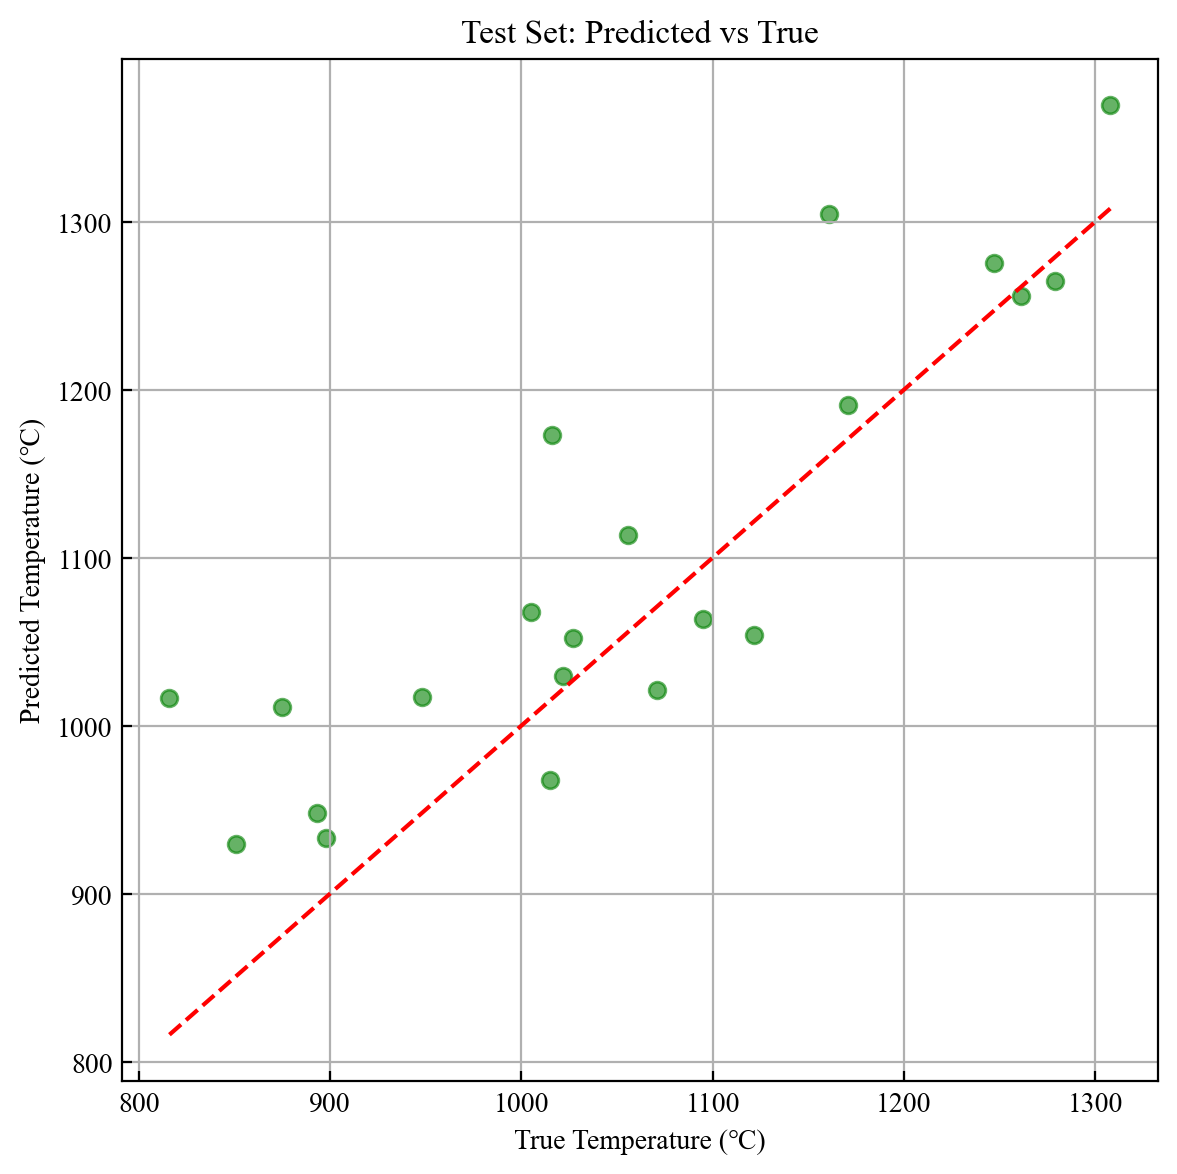

In [66]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rescaled, test_pred_rescaled, alpha=0.6, color='green')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()],
         [y_test_rescaled.min(), y_test_rescaled.max()], 'r--')
plt.xlabel("True Temperature (℃)")
plt.ylabel("Predicted Temperature (℃)")
plt.title("Test Set: Predicted vs True")
plt.grid(True)
plt.tight_layout()
plt.show()